In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Reading the PCG Data

In [2]:
import scipy.io.wavfile as wavfile

In [3]:
def read_wav_files(path):
    files=os.listdir(path)
    lst=[]
    wav_files= [file for file in files if file.endswith('.wav')]
    
    for wav in wav_files:
        Fs, data= wavfile.read(wav)
        lst.append((Fs, data, wav))
        
    return lst

In [4]:
files=read_wav_files('/home/ettexham/Desktop/Digital_Signal_Processing/Lab Works/PCG_Filtering/')

## Visualizing the data

In [5]:
def visualize_data(y, Fs, name):
    time = np.arange(len(y)) / Fs

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    #Waveform
    axs[0].plot(time, y)
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title('Audio Waveform '+name)
    axs[0].grid(True)

    # Spectrogram
    axs[1].specgram(y, Fs=Fs, NFFT=1024, cmap='viridis')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('Frequency (Hz)')
    axs[1].set_title('Spectrogram '+name)
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

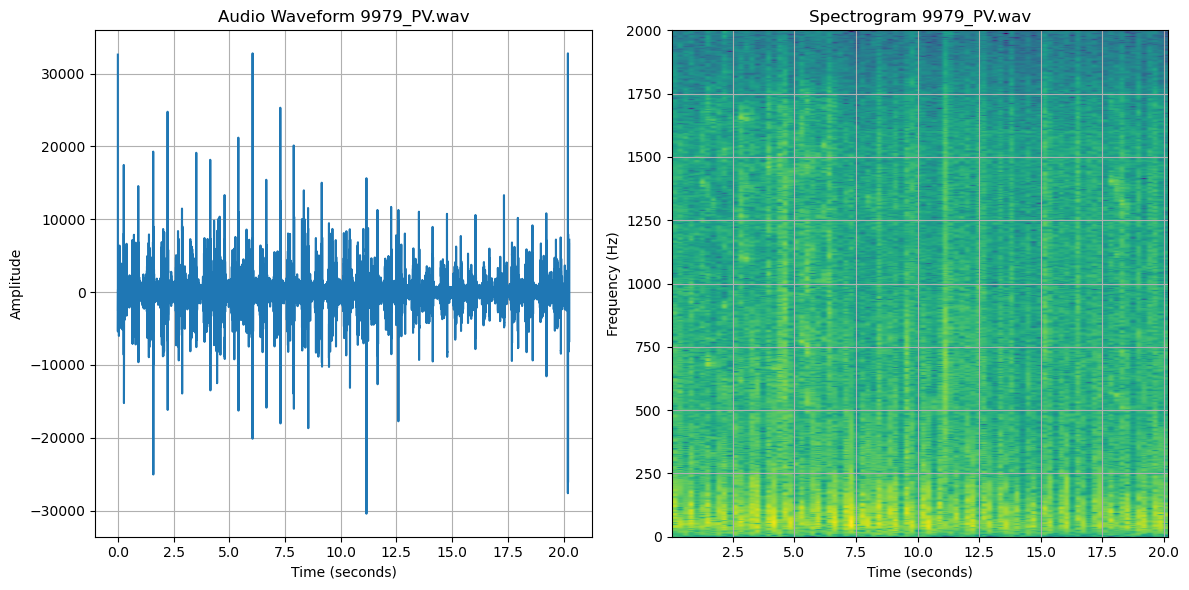

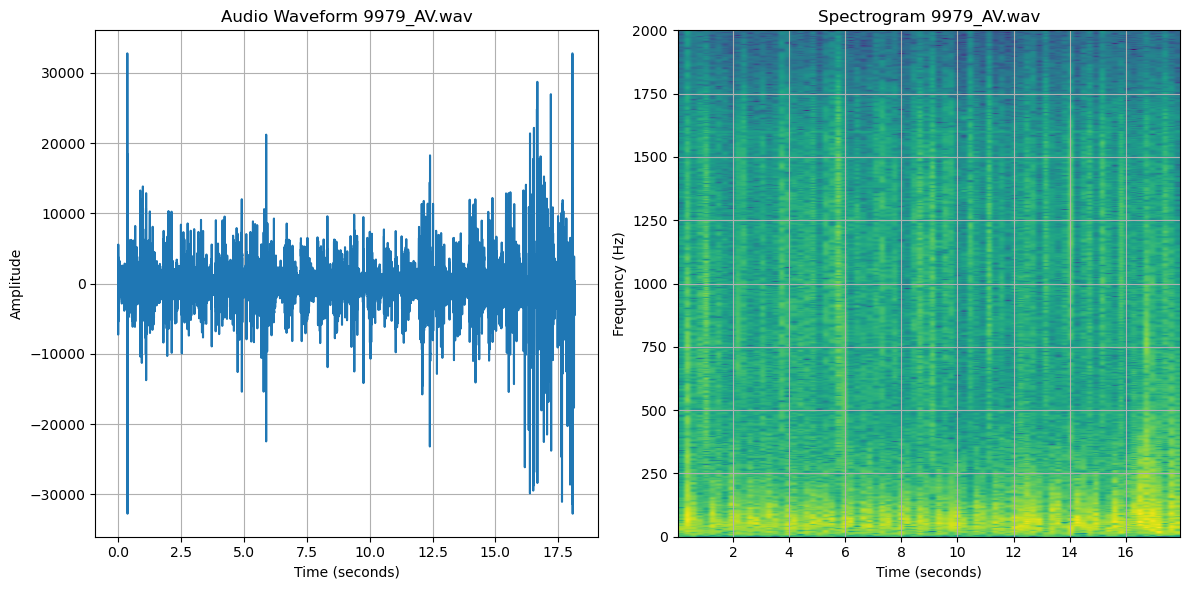

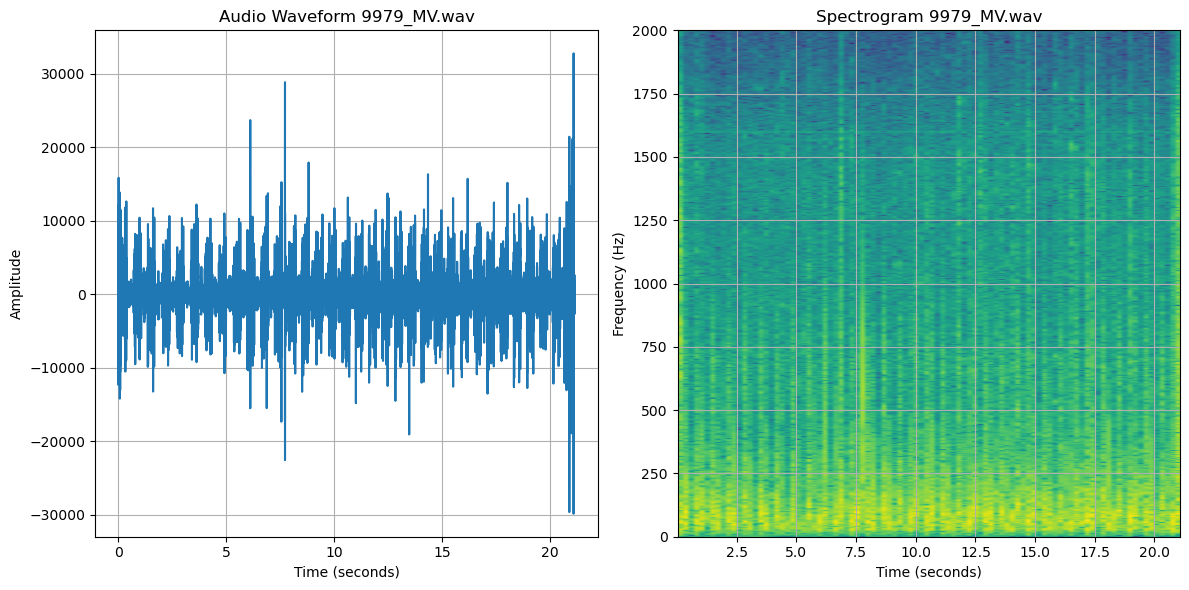

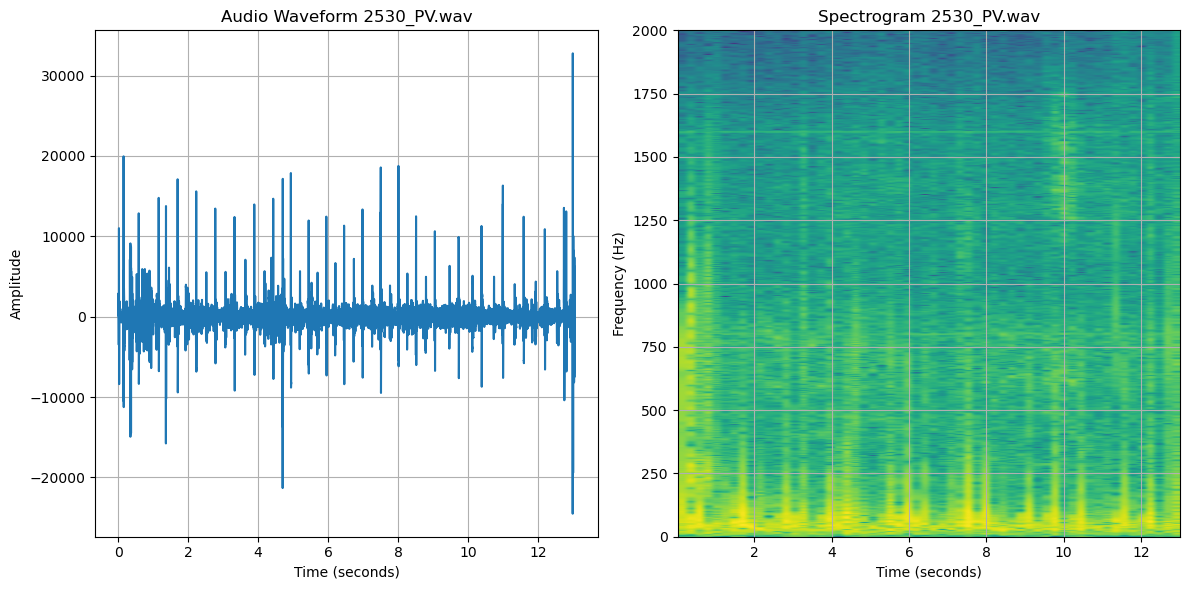

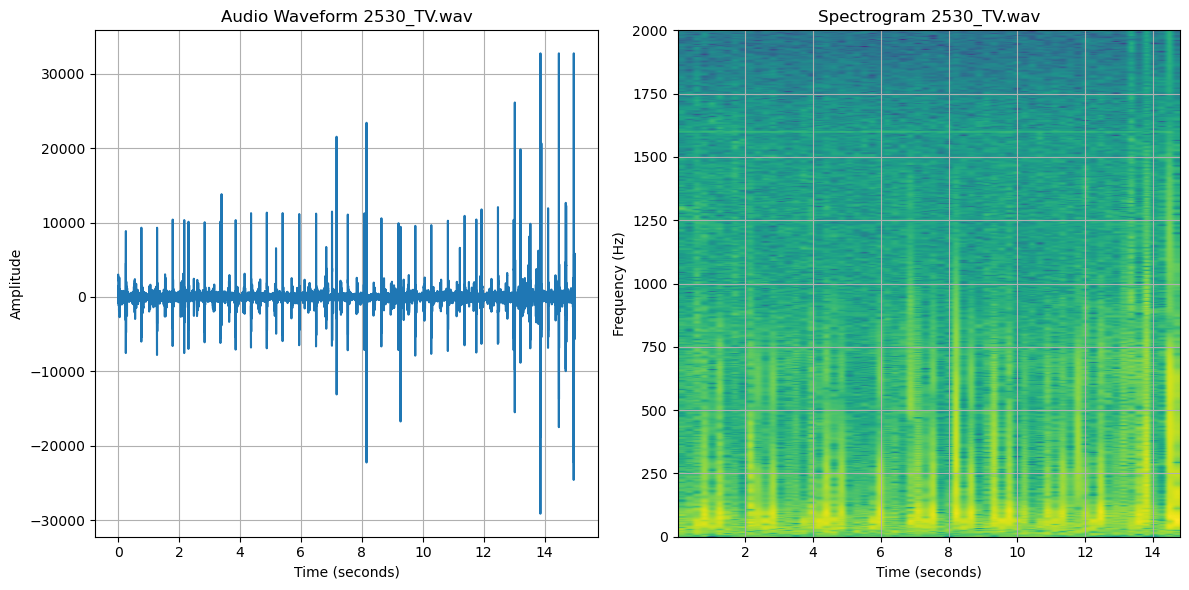

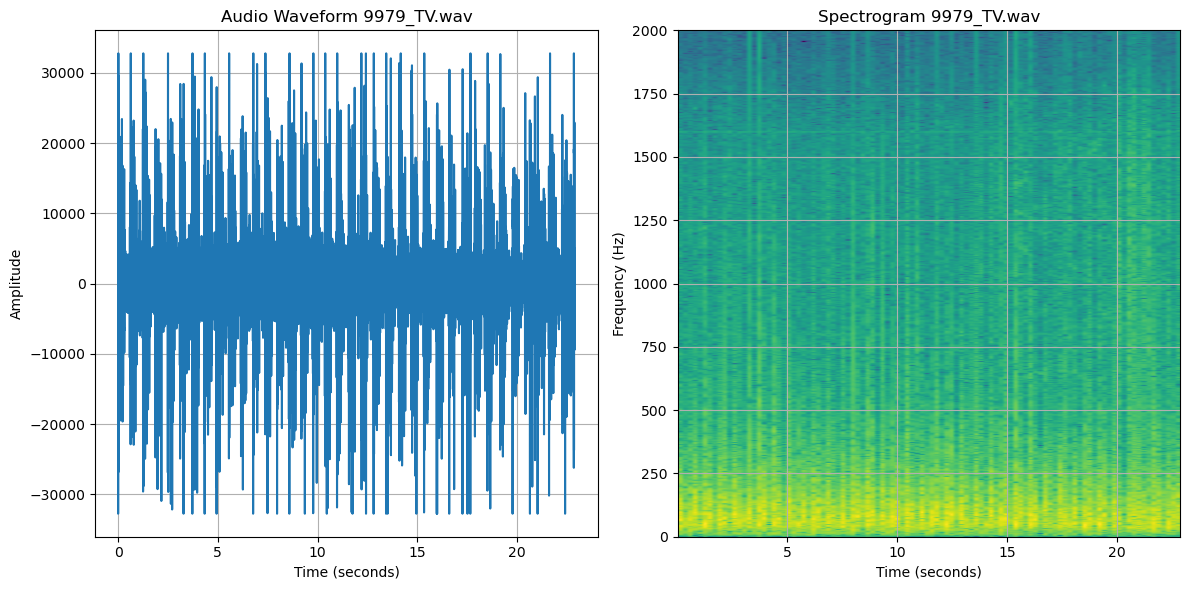

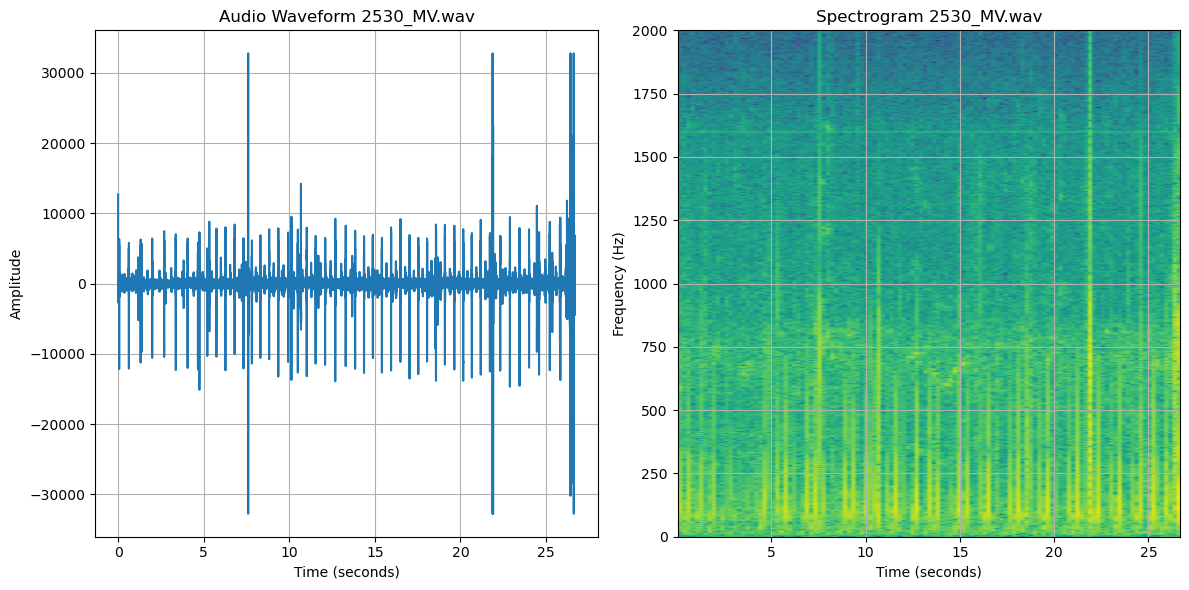

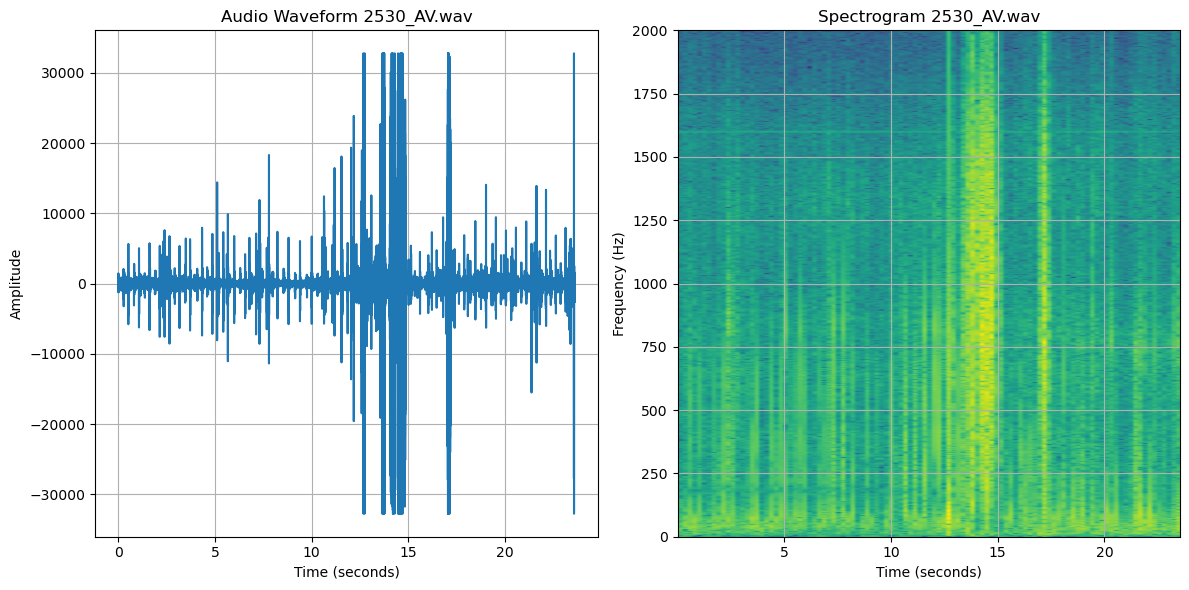

In [6]:
for i in files:
    visualize_data(i[1], i[0], i[2])

## Applying the FFT

In [7]:
def plot_fft(data, sampling_freq,filename):
    fft_data=np.fft.fft(data)
    length= len(fft_data)
    freq = np.fft.fftfreq(length, d=1/sampling_freq)
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.abs(freq)[:5000], np.abs(fft_data)[:5000])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('FFT of Input Signal '+filename)
    plt.grid(True)
    plt.show()

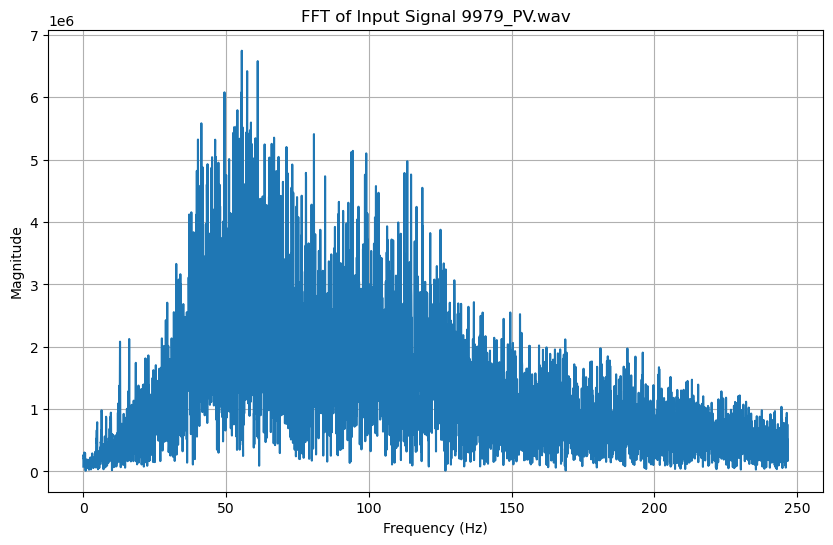

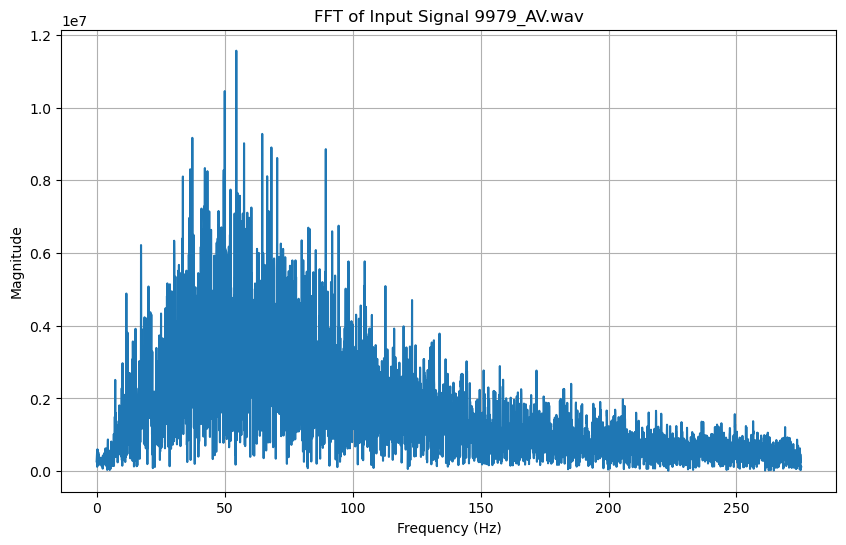

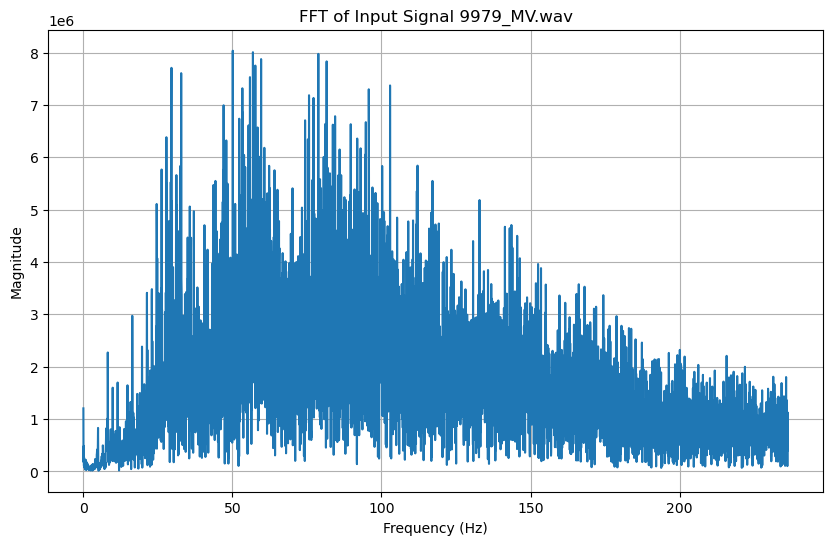

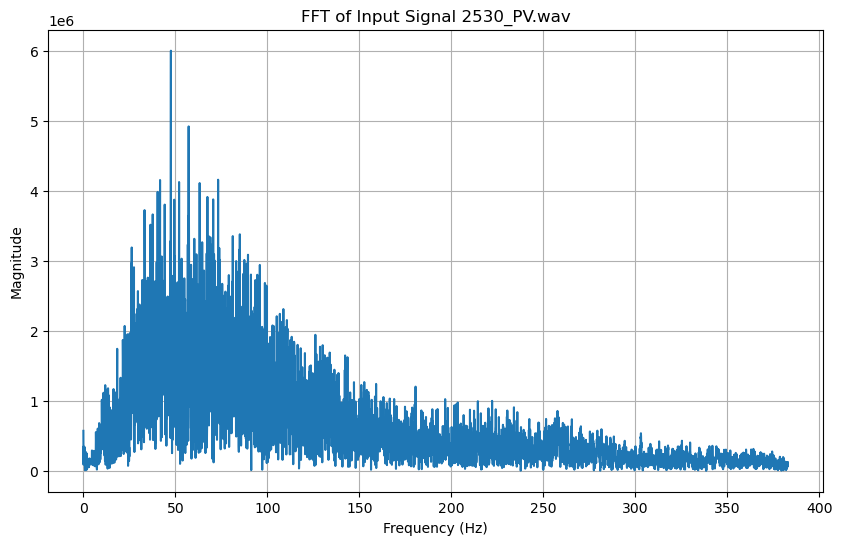

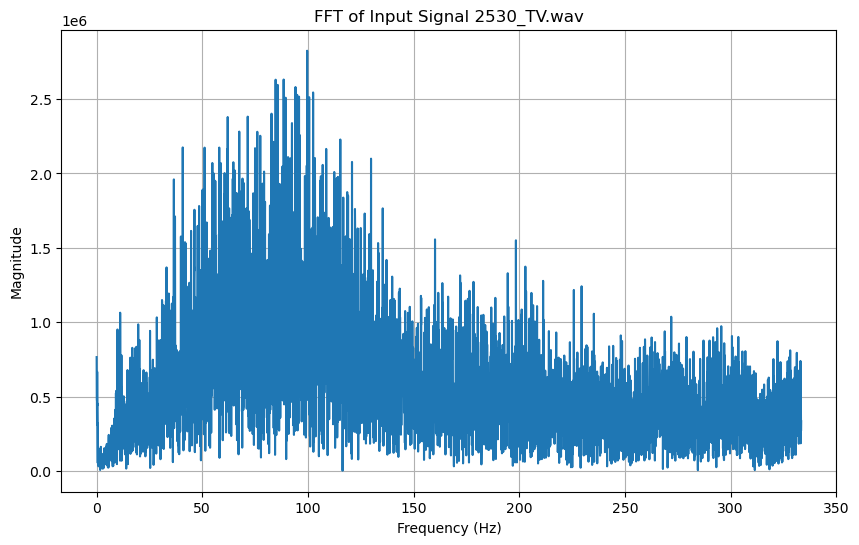

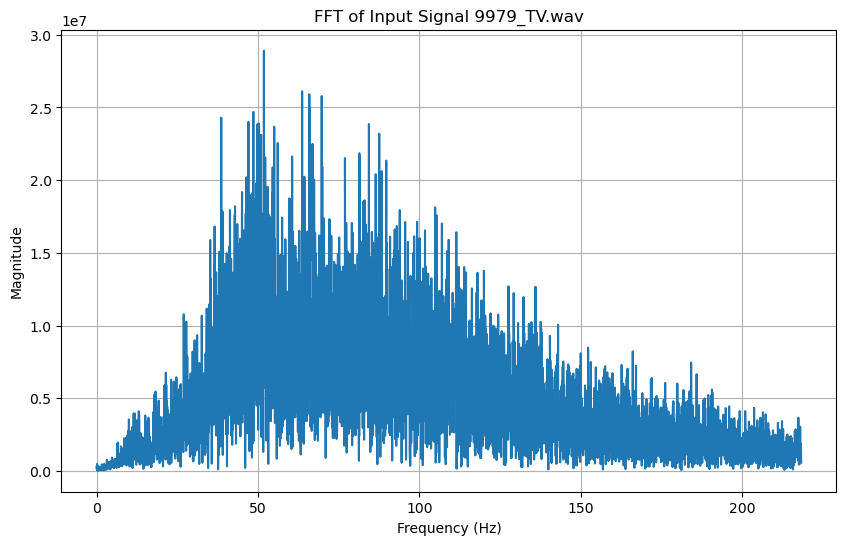

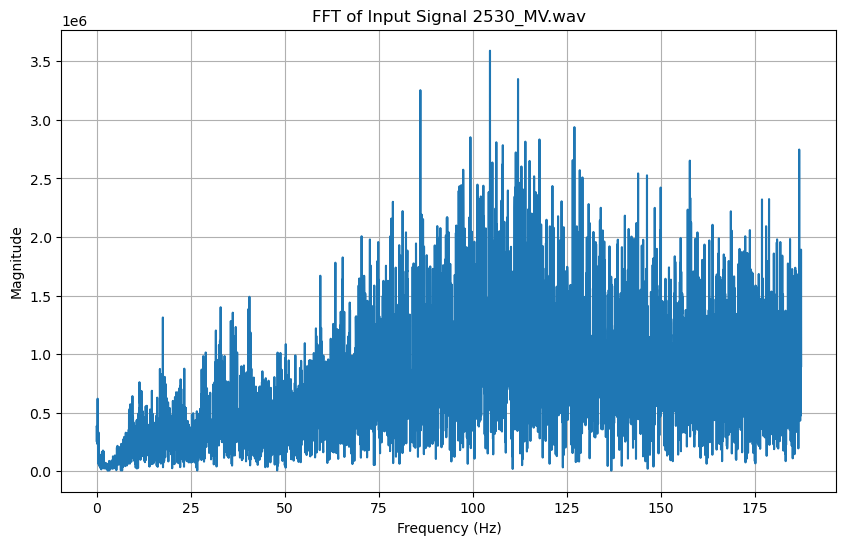

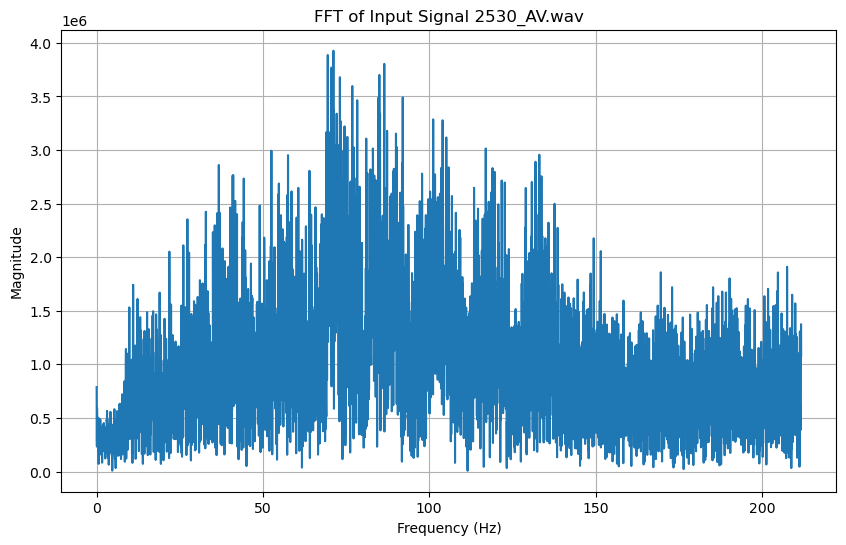

In [8]:
for i in files:
    plot_fft(i[1], i[0], i[2])

### From the curves, it can be deduced that the bandpass should be in between 25Hz to 150Hz

## Butterworth Filter

In [9]:
from scipy.signal import butter, filtfilt

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

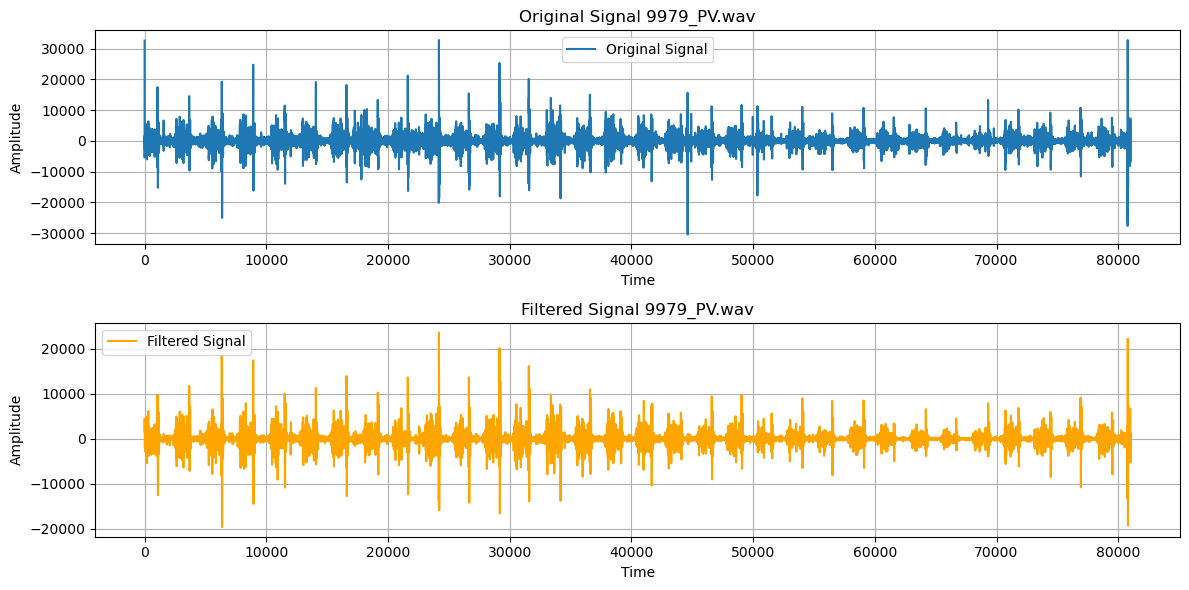

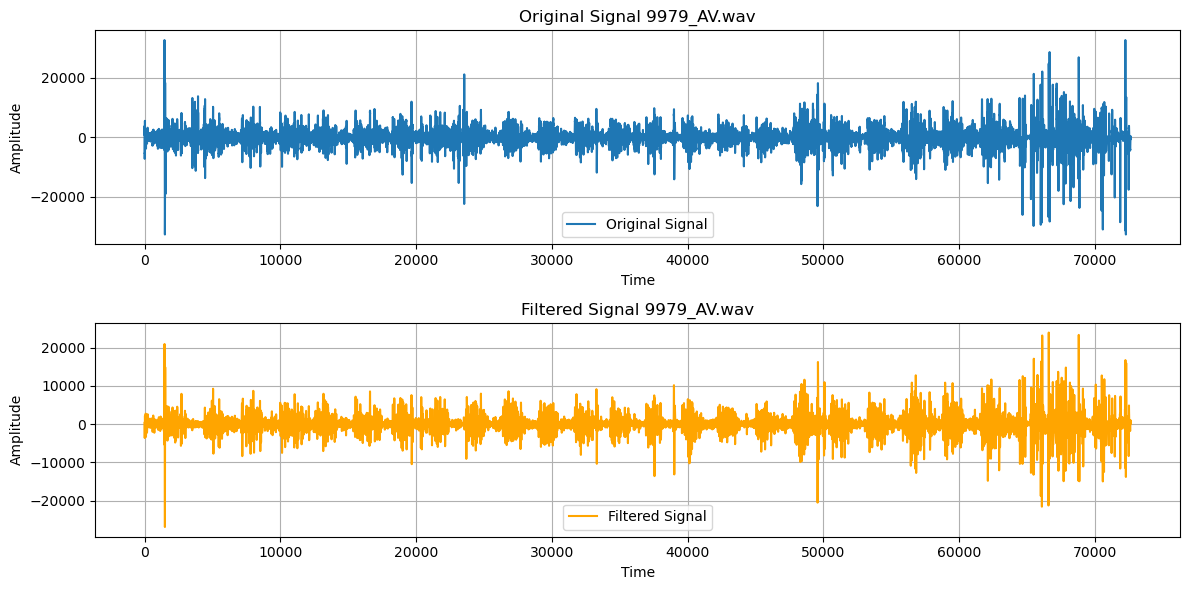

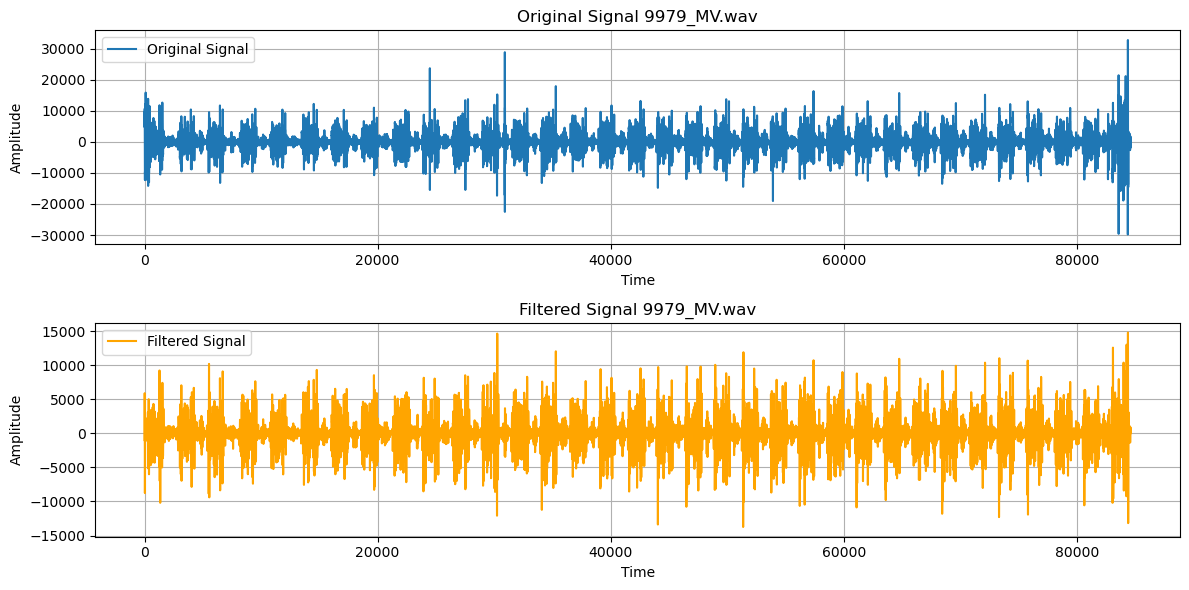

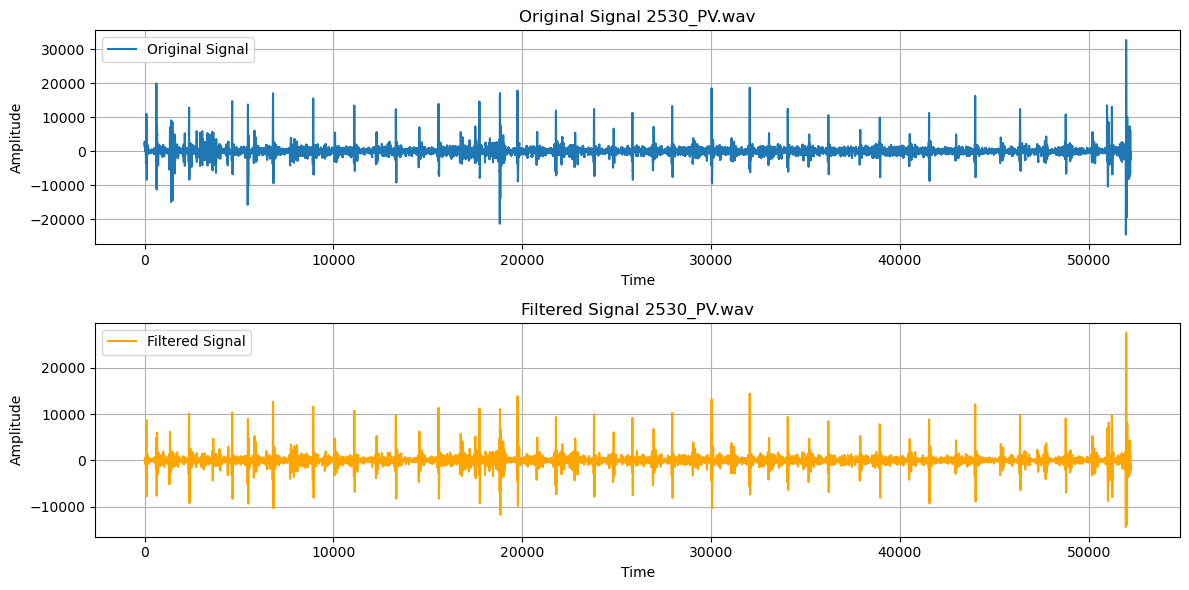

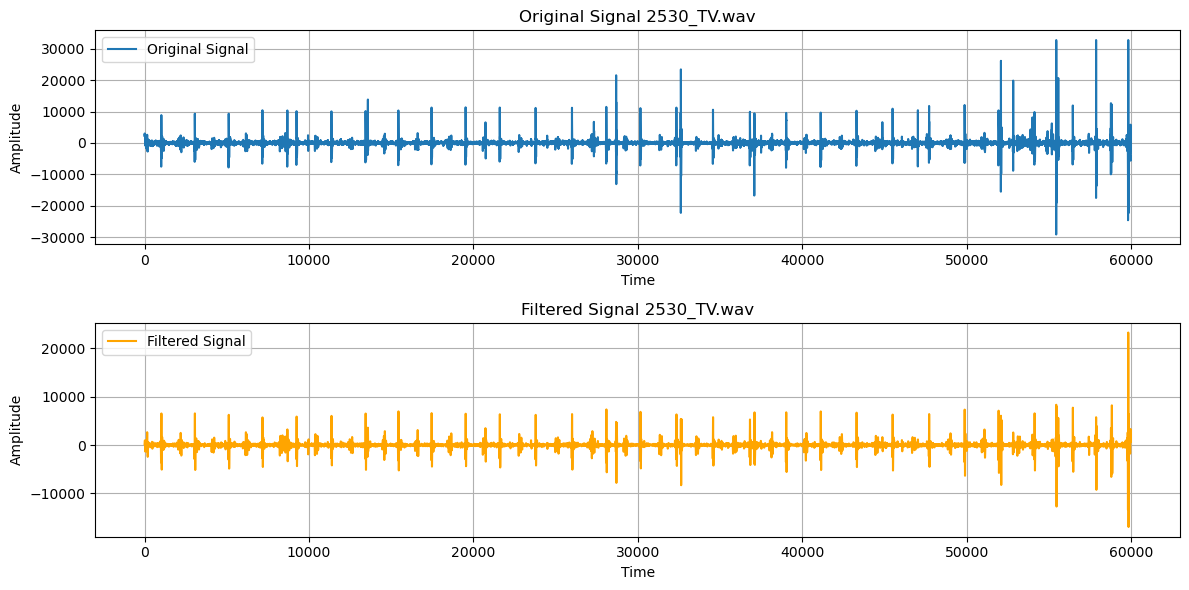

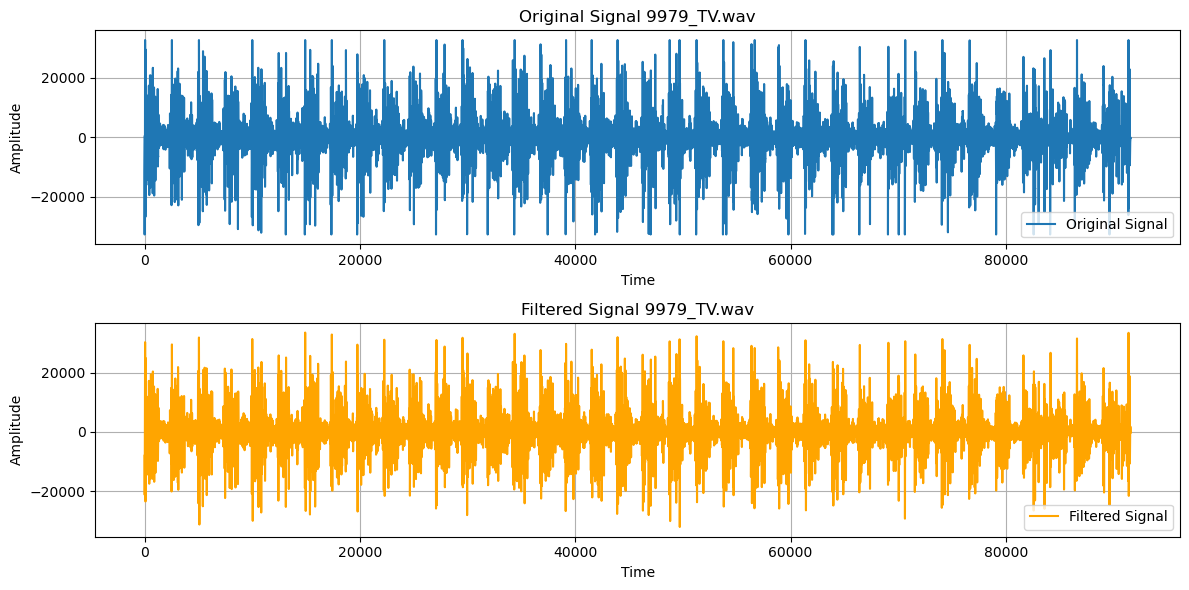

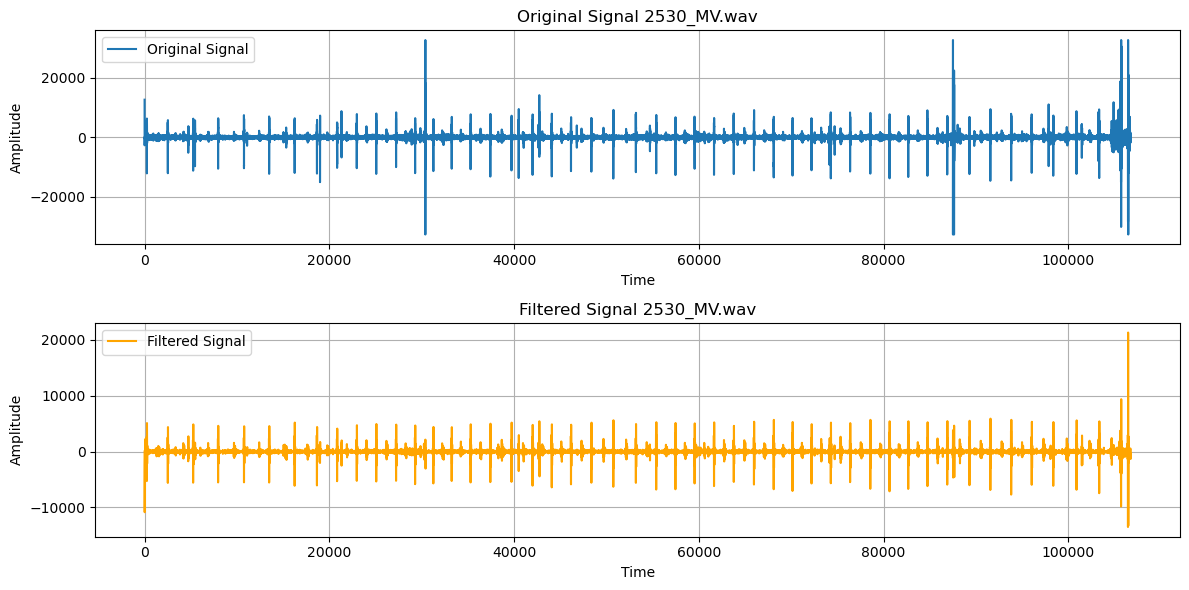

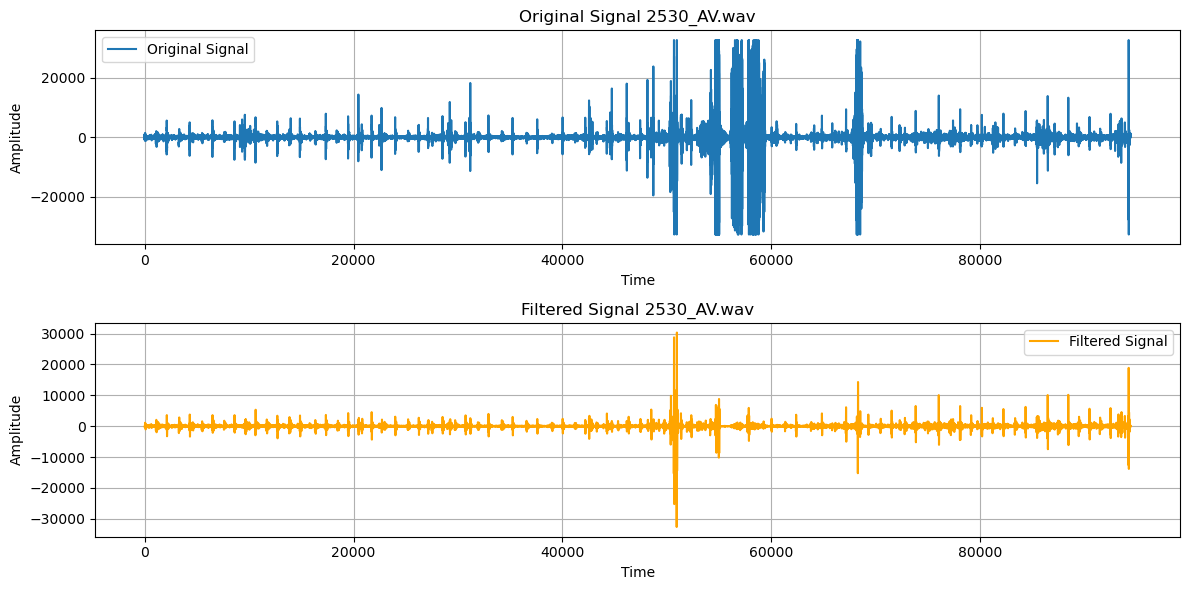

In [11]:
for file in files:
    filtered_signal = butter_bandpass_filter(file[1], 25, 150, file[0], 5)
    
    plt.figure(figsize=(12, 6))

    # Plot original signal
    plt.subplot(2, 1, 1)
    plt.plot(file[1], label='Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    # Plot filtered signal
    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal, color='orange', label='Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## Chebshey Filter

In [12]:
from scipy.signal import cheby1, filtfilt

def chebyshev_bandpass_filter(data, lowcut, highcut, fs, order=5, rp=0.1):

    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = cheby1(order, rp, [low, high], btype='bandpass')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

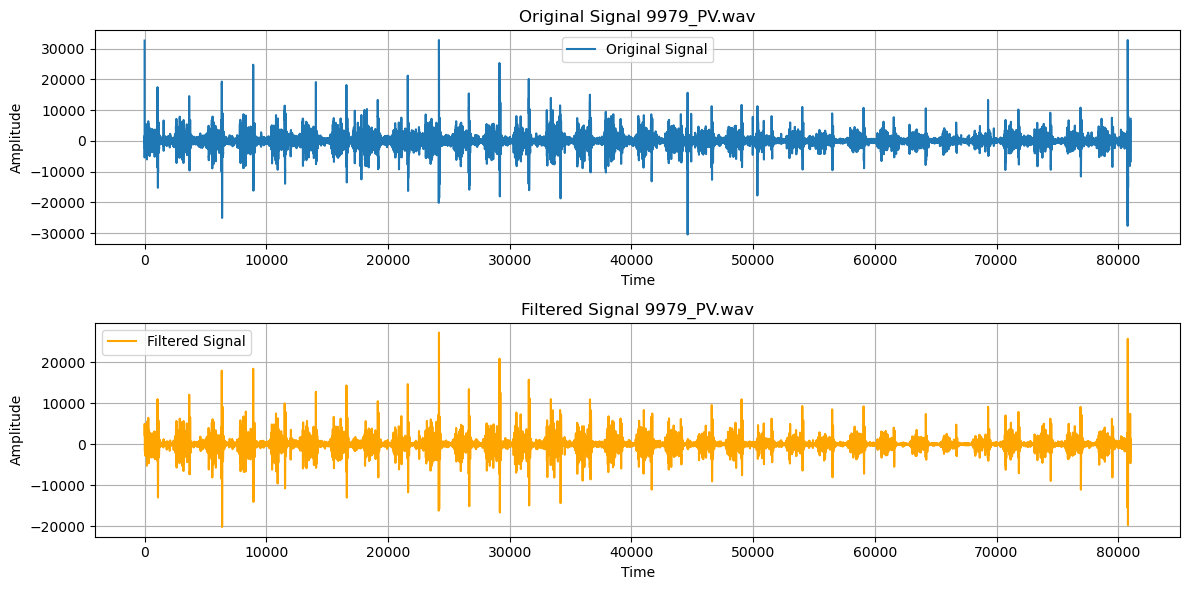

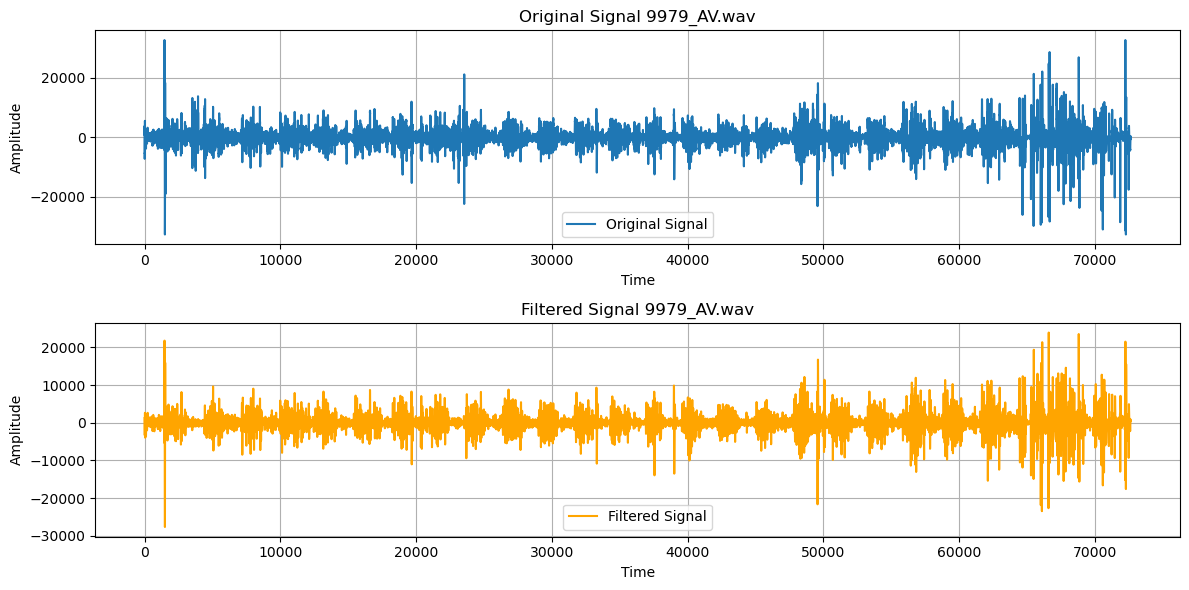

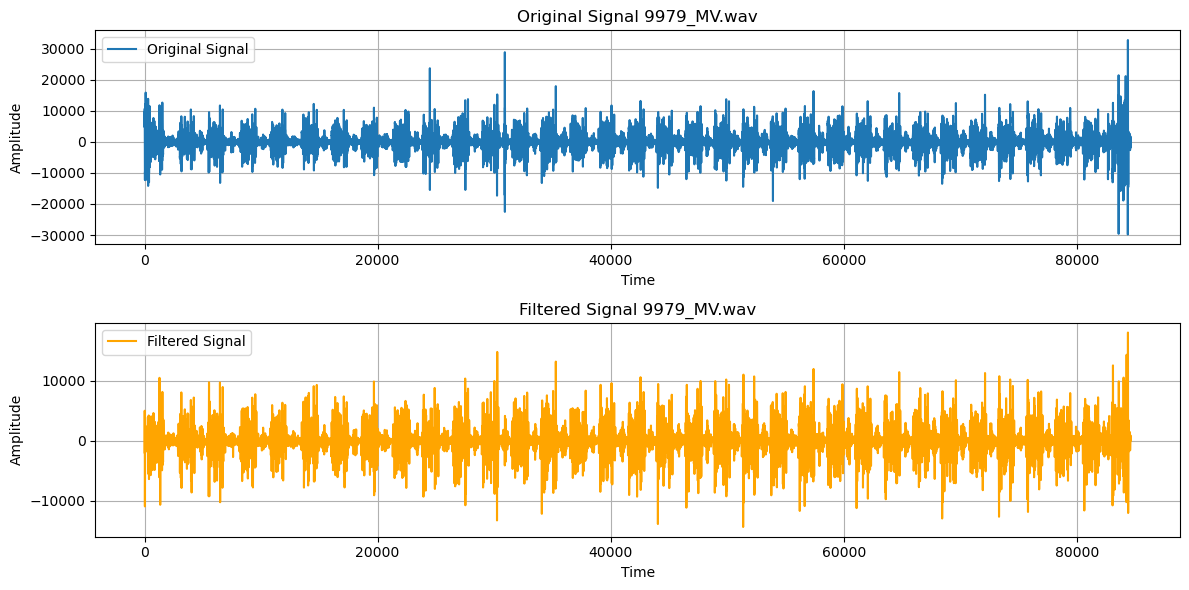

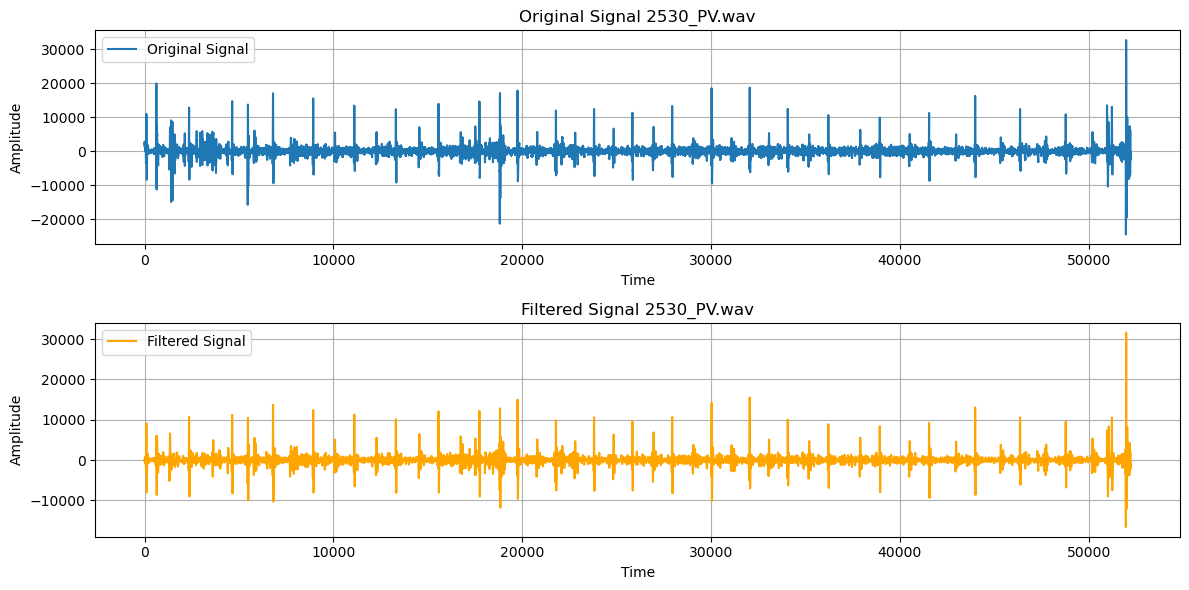

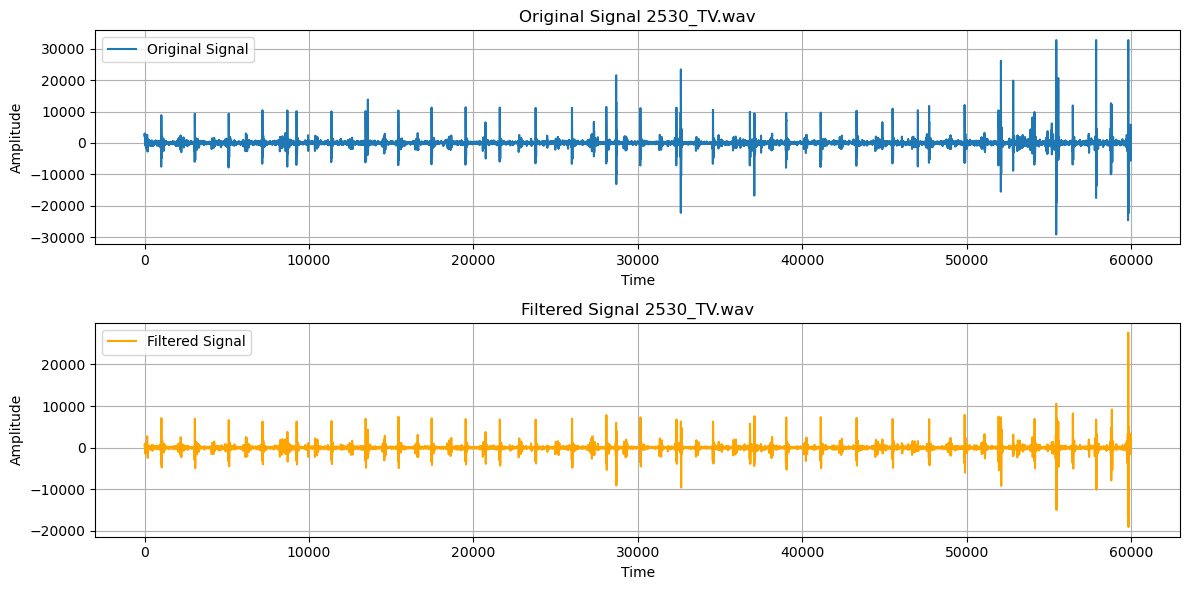

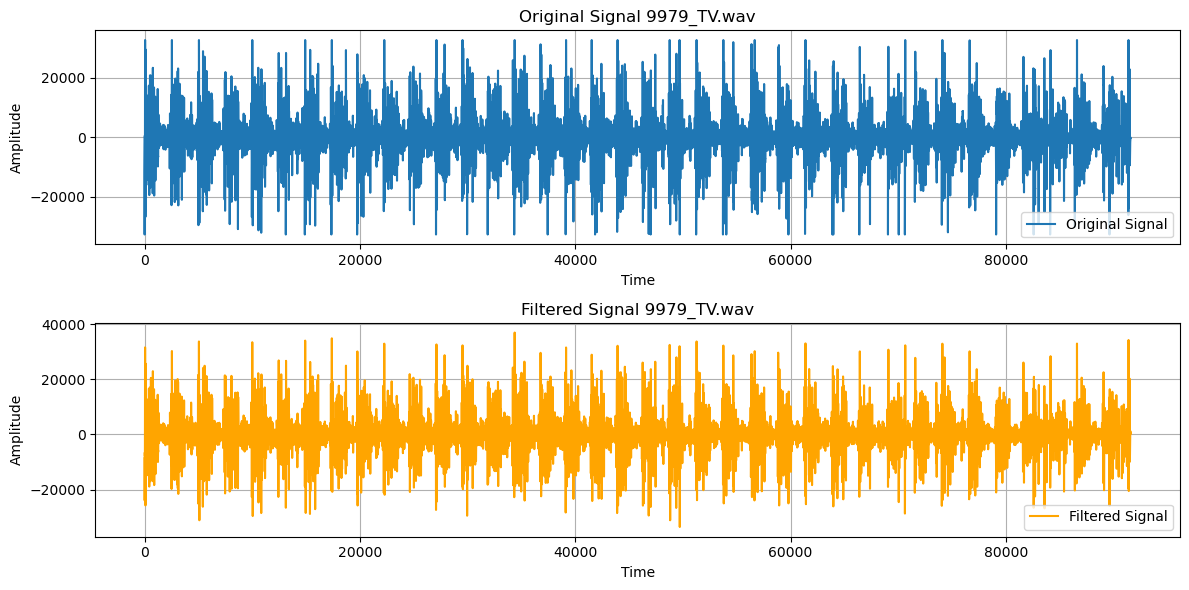

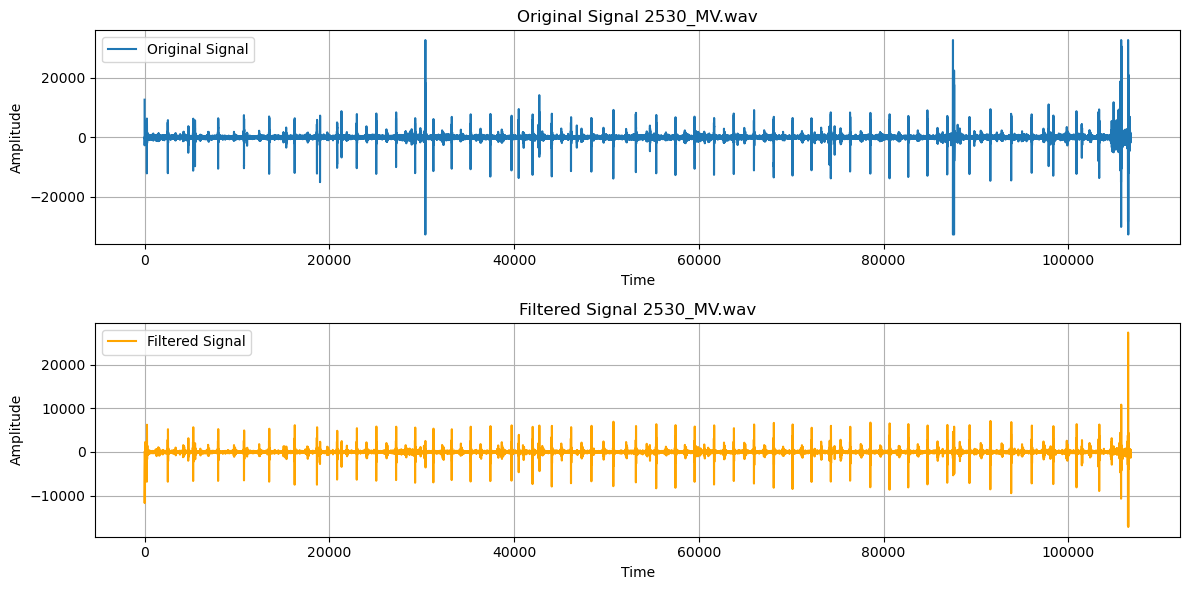

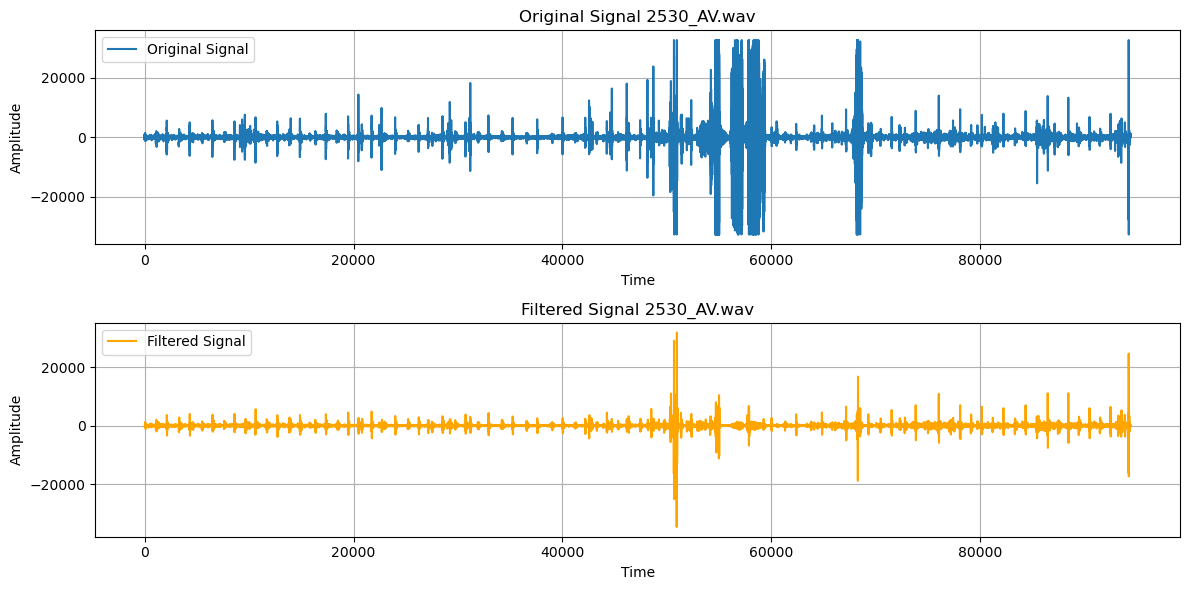

In [13]:
for file in files:
    filtered_signal = chebyshev_bandpass_filter(file[1], 25, 150, file[0], 4)
    
    plt.figure(figsize=(12, 6))

    # Plot original signal
    plt.subplot(2, 1, 1)
    plt.plot(file[1], label='Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    # Plot filtered signal
    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal, color='orange', label='Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## Median Filter

In [14]:
from scipy.signal import medfilt

def median_filter(data, kernel_size):
    filtered_data = medfilt(data, kernel_size)
    return filtered_data

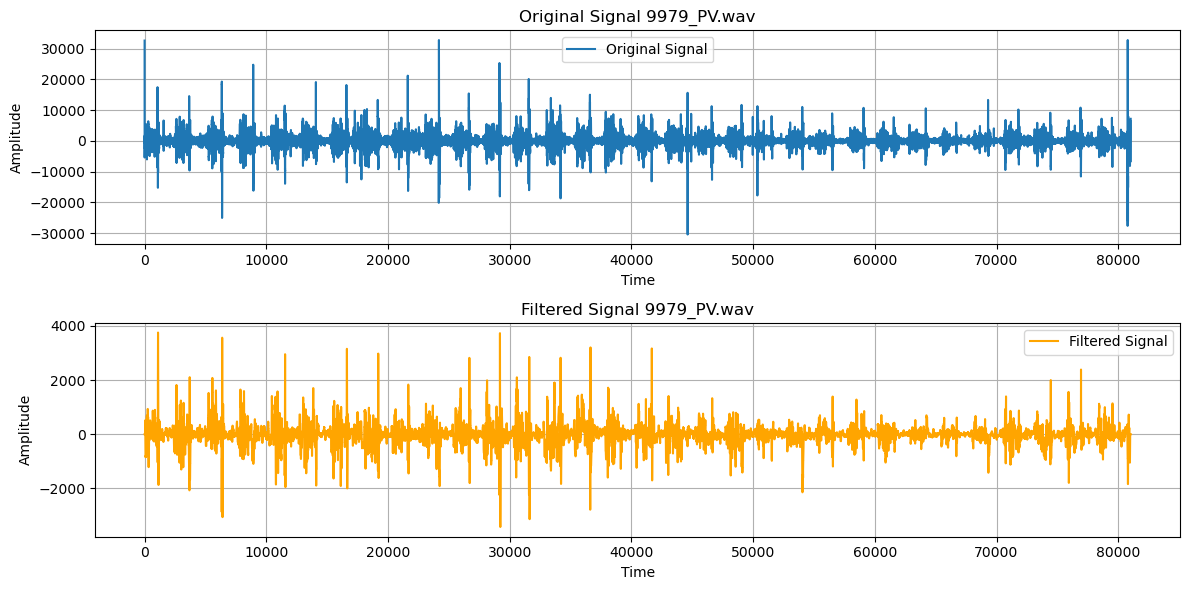

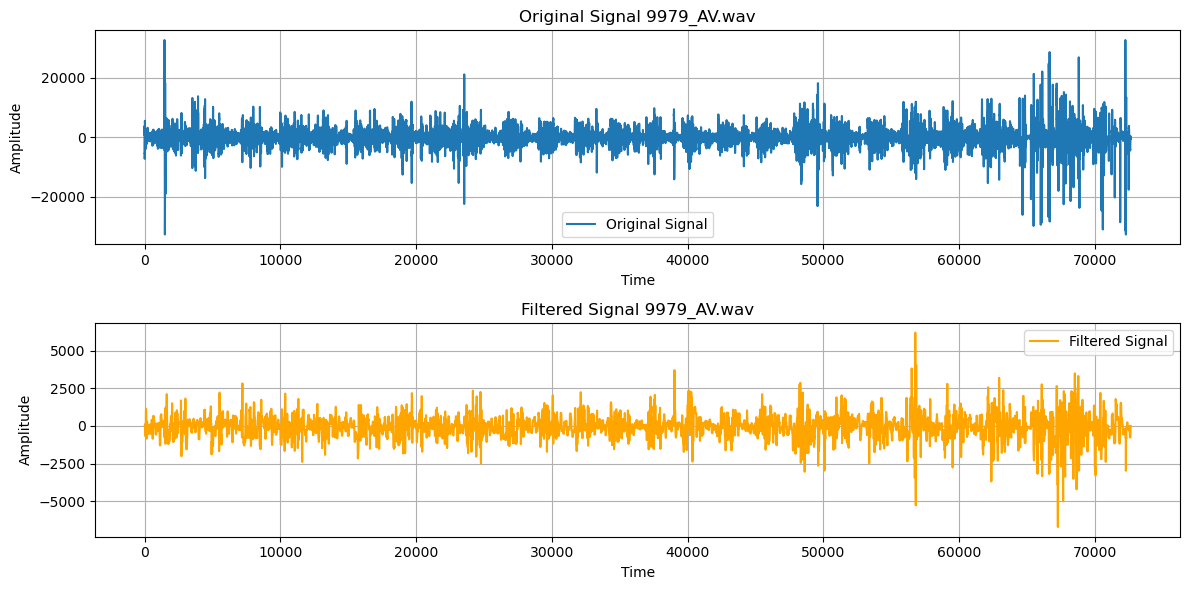

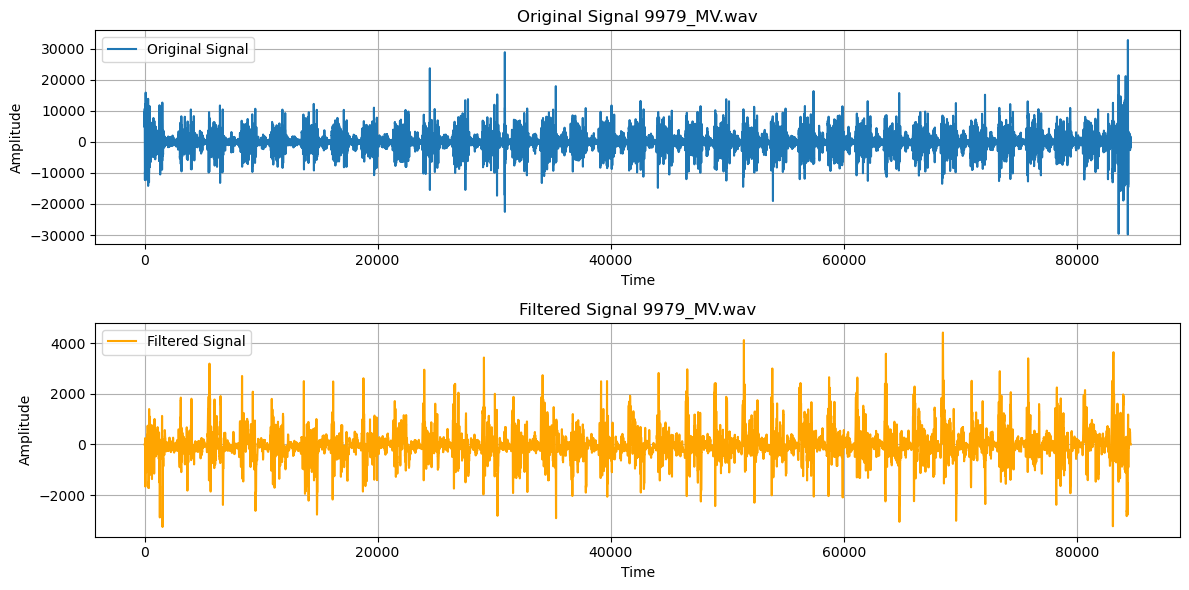

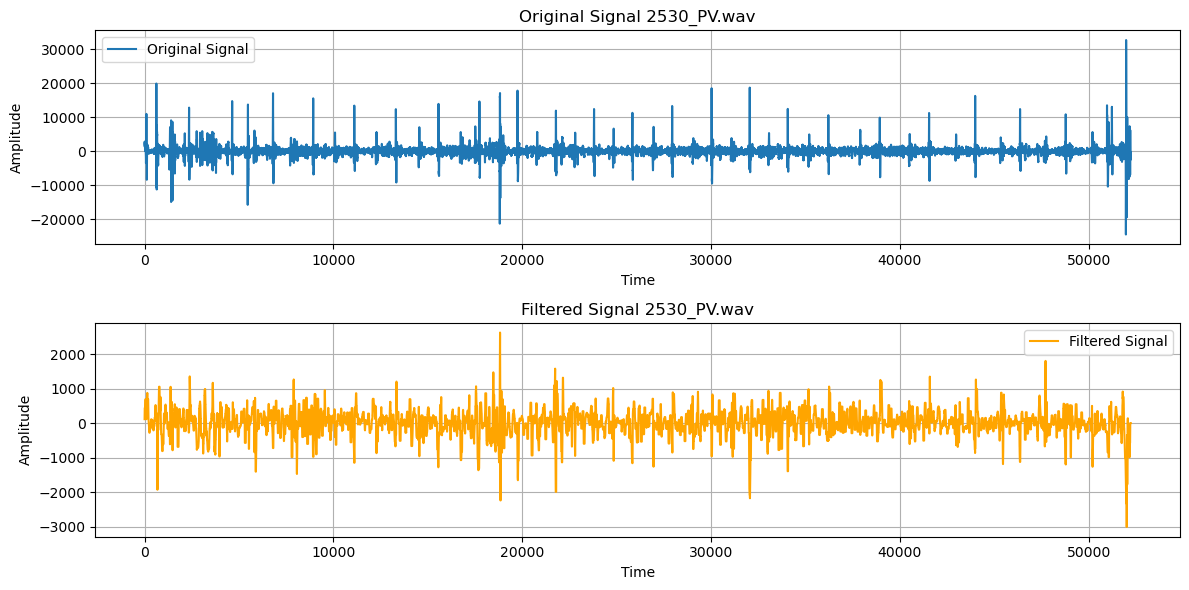

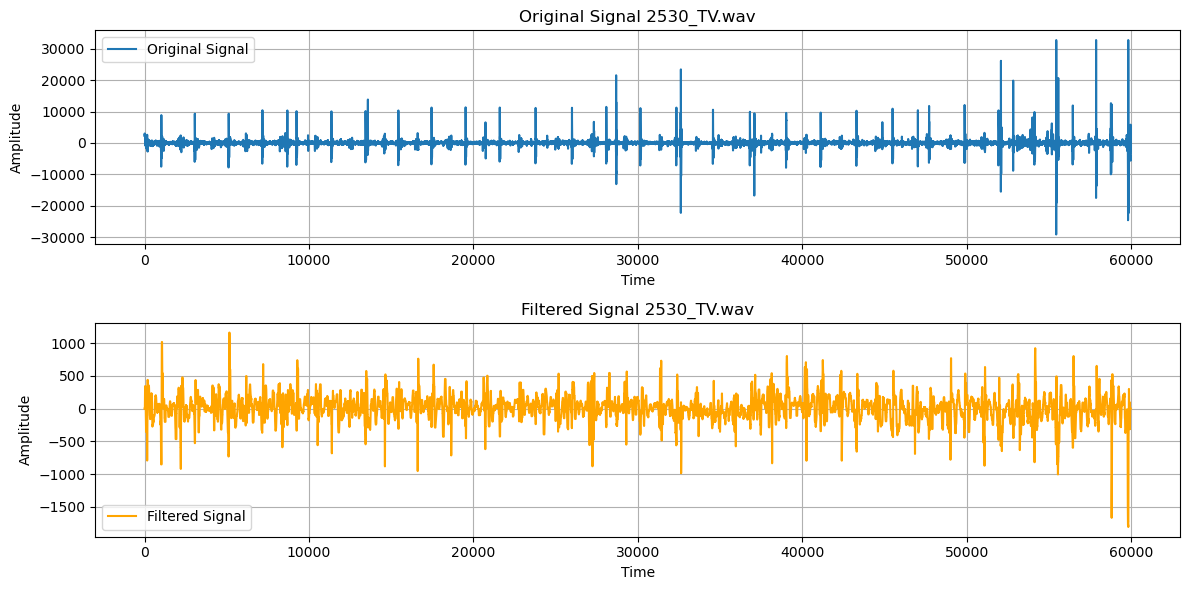

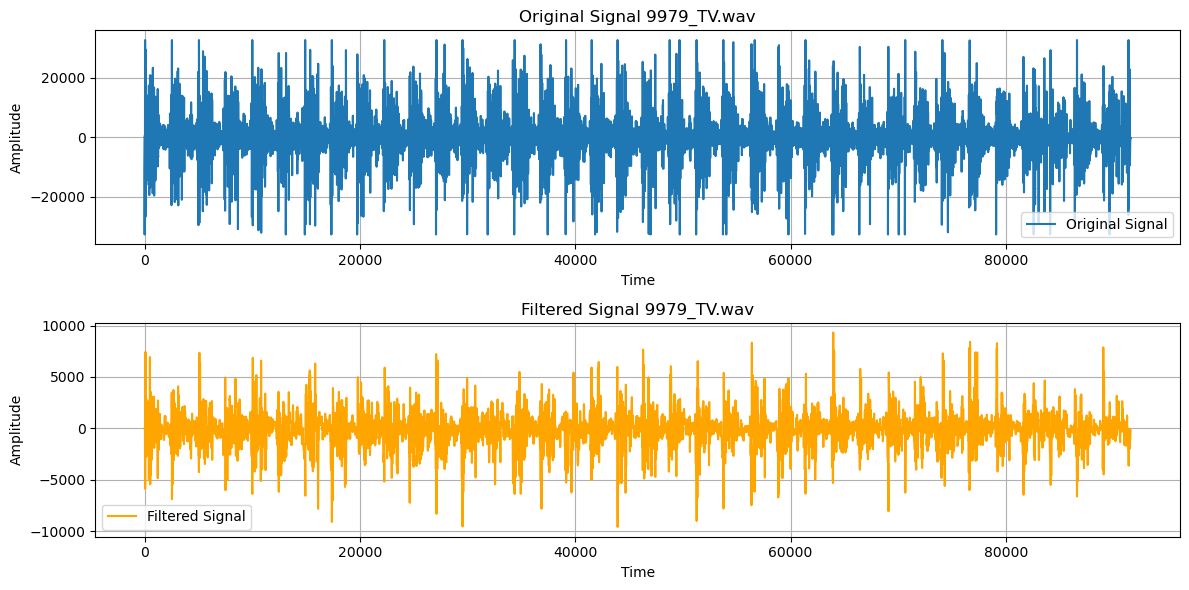

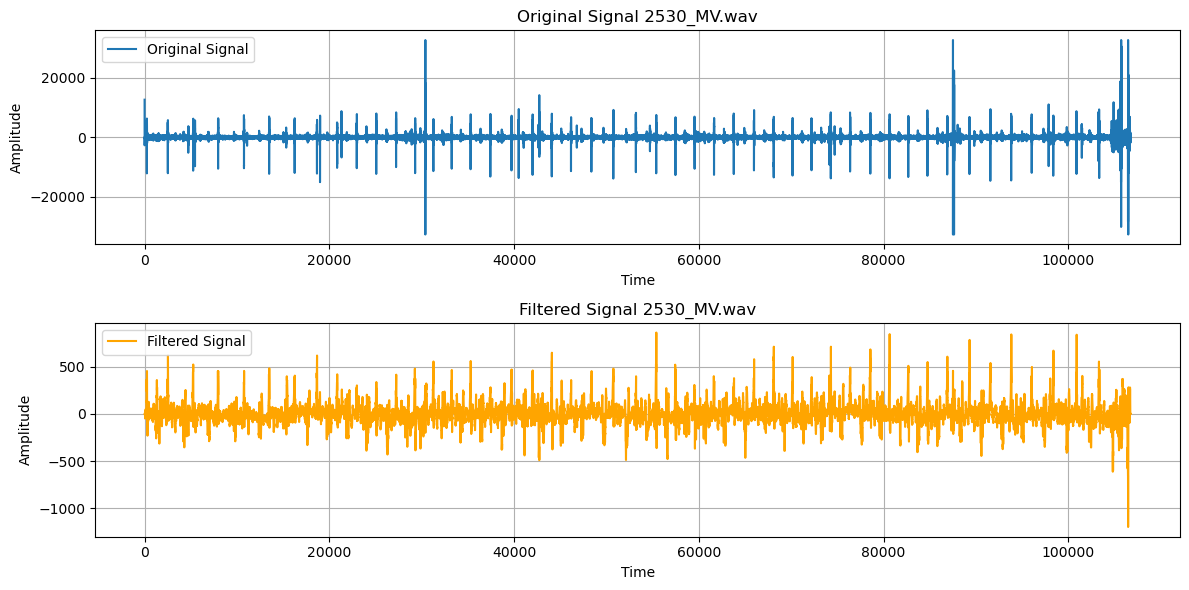

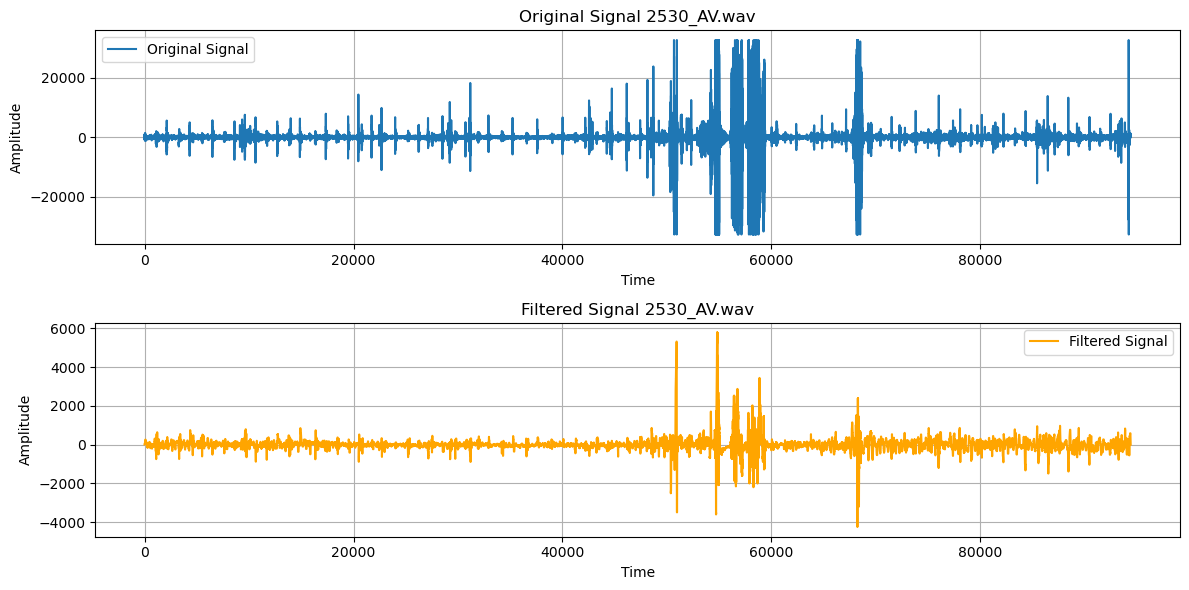

In [15]:
for file in files:
    filtered_signal = median_filter(file[1], 99)
    
    plt.figure(figsize=(12, 6))

    # Plot original signal
    plt.subplot(2, 1, 1)
    plt.plot(file[1], label='Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    # Plot filtered signal
    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal, color='orange', label='Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal '+ file[2])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()